In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

%matplotlib inline

df = pd.read_csv("train.csv").replace("male",0).replace("female",1)

#PassengerID:　乗客ID
#Survived: 　　生存結果 (1: 生存, 2: 死亡)　
#Pclass: 　　　乗客の階級 1が一番位が高いそう
#Name: 　　 　乗客の名前
#Sex: 　　　　 性別
#Age: 　　　　 年齢
#SibSp 　　 　 兄弟、配偶者の数。
#Parch 　　　　両親、子供の数。
#Ticket 　　　 チケット番号。
#Fare 　　　　 乗船料金。
#Cabin 　　　　部屋番号
#Embarked 　　 乗船した港　Cherbourg、Queenstown、Southamptonの３種類

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Missing Values
# df["Age"].fillna(df.Age.median(), inpace=True)
df.info()
# Age カラムに NaN がある行を削除
df.dropna(subset=['Age'])

# NaN がひとつでもある行を削除
#df.dropna()
# 0 or 1 行目に NaN がある列を削除
#df_na.dropna(axis=1, subset=[0, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S


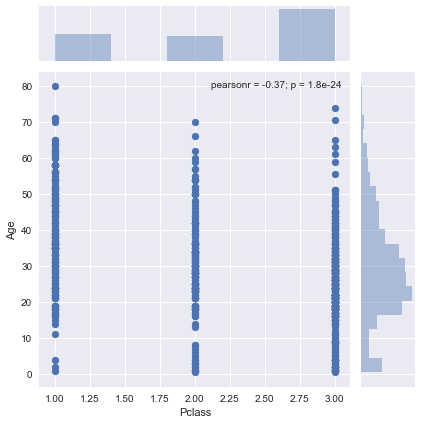

In [5]:
#tips = sns.load_dataset("tips")
g = sns.jointplot(x="Pclass", y="Age", data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


KeyError: "['total_bill'] not in index"

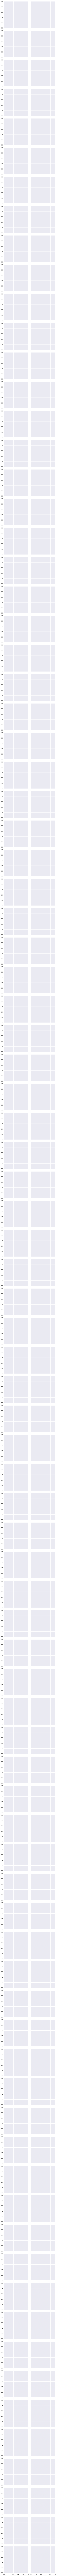

In [7]:
#sns.countplot('Sex', data=df)
#sns.set_style("whitegrid")
#tips = sns.load_dataset(df)
g = sns.FacetGrid(df, row="Age", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

In [ ]:
sns.countplot('Sex', data=df, hue ='Pclass')
sns.set_style("whitegrid")
plt.show()

In [ ]:
sns.countplot('Age', data=df)
sns.set_style("whitegrid")
plt.show()

In [ ]:
# Data Wrangling

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df2 = df.drop(["Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)

In [ ]:
df2

In [8]:
df2.dtypes

NameError: name 'df2' is not defined

In [33]:
train_data = df2.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

forest = RandomForestClassifier(n_estimators = 100)

# Learning
forest = forest.fit(xs, y)

test_df= pd.read_csv("test.csv").replace("male",0).replace("female",1)
# 欠損値の補完
test_df["Age"].fillna(df.Age.median(), inplace=True)
test_df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
test_df2 = test_df.drop(["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis=1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').